# Preparing the data

Here we will clean the data in certain level. We will remove the records before 2015, concatenate the two records, adjust the field names, and select the common fields for all years.

The next notebooks will have special preparations depending on its specific tasks, such as Regression and Clustering.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
UAE = "United Arab Emirates"

In [3]:
hpast = pd.read_csv("data/world-happiness-report.csv")

According the [UAE official website](https://u.ae/en/about-the-uae/the-uae-government/government-of-future/happiness), in 2016 was created the Ministry of Happiness, with the objective for the country to be among the best in the world in the Human Development Index and the happiest of all nations so that its citizens feel proud to belong to the UAE. Later, in 2020, the subject was moved to the Ministry of Community Development.

Therefore, we will study data only after 2015, i.e., one year before the Ministry of Happiness creation.

In [4]:
hpast = hpast.loc[hpast["year"] >= 2015]

In [5]:
hpast = hpast.set_index(["Country name", "year"])
hpast

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2015        3.983               7.702           0.529   
             2016        4.220               7.697           0.559   
             2017        2.662               7.697           0.491   
             2018        2.694               7.692           0.508   
             2019        2.375               7.697           0.420   
...                        ...                 ...             ...   
Zimbabwe     2016        3.735               7.984           0.768   
             2017        3.638               8.016           0.754   
             2018        3.616               8.049           0.775   
             2019        2.694               7.950           0.759   
             2020        3.160               7.829           0.717   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2015                              53.2   
             2016                              53.0   
             2017                              52.8   
             2018                              52.6   
             2019                              52.4   
...                                             ...   
Zimbabwe     2016                              54.4   
             2017                              55.0   
             2018                              55.6   
             2019                              56.2   
             2020                              56.8   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2015                         0.389       0.080   
             2016                         0.523       0.042   
             2017                         0.427      -0.121   
             2018                         0.374      -0.094   
             2019                         0.394      -0.108   
...                                         ...         ...   
Zimbabwe     2016                         0.733      -0.095   
             2017                         0.753      -0.098   
             2018                         0.763      -0.068   
             2019                         0.632      -0.064   
             2020                         0.643      -0.009   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2015                      0.881            0.554            0.339  
             2016                      0.793            0.565            0.348  
             2017                      0.954            0.496            0.371  
             2018                      0.928            0.424            0.405  
             2019                      0.924            0.351            0.502  
...                                      ...              ...              ...  
Zimbabwe     2016                      0.724            0.738            0.209  
             2017                      0.751            0.806            0.224  
             2018                      0.844            0.710            0.212  
             2019                      0.831            0.716            0.235  
             2020                      0.789            0.703            0.346  

[813 rows x 9 columns]

In [6]:
h21 = pd.read_csv("data/world-happiness-report-2021.csv")

In [7]:
h21

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [8]:
h21["year"] = 2021

In [9]:
h21 = h21.set_index(["Country name", "year"])
h21

,,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,year,,,,,,,,,,,,,,,,,,,
Finland,2021,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,2021,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,2021,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,2021,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,2021,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lesotho,2021,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
Botswana,2021,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
Rwanda,2021,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095


Check the common fields between the two files:

In [10]:
features = set(hpast.columns).intersection(h21.columns)
features

{'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Social support'}

There is more common fields than the presented in the last result. The issue here is the names are slightly divergent. So, I'll adjust the names:

In [11]:
hpast_features = ["Life Ladder" , "Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
                  "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
h21_features = ["Ladder score", "Logged GDP per capita", "Social support", "Healthy life expectancy", 
                "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
rename = dict(zip(hpast_features, h21_features))
rename

{'Life Ladder': 'Ladder score',
 'Log GDP per capita': 'Logged GDP per capita',
 'Social support': 'Social support',
 'Healthy life expectancy at birth': 'Healthy life expectancy',
 'Freedom to make life choices': 'Freedom to make life choices',
 'Generosity': 'Generosity',
 'Perceptions of corruption': 'Perceptions of corruption'}

In [12]:
hpast = hpast.rename(columns=rename)
hpast

Ladder score  Logged GDP per capita  Social support  \
Country name year                                                        
Afghanistan  2015         3.983                  7.702           0.529   
             2016         4.220                  7.697           0.559   
             2017         2.662                  7.697           0.491   
             2018         2.694                  7.692           0.508   
             2019         2.375                  7.697           0.420   
...                         ...                    ...             ...   
Zimbabwe     2016         3.735                  7.984           0.768   
             2017         3.638                  8.016           0.754   
             2018         3.616                  8.049           0.775   
             2019         2.694                  7.950           0.759   
             2020         3.160                  7.829           0.717   

                   Healthy life expectancy  Freedom to make life choices  \
Country name year                                                          
Afghanistan  2015                     53.2                         0.389   
             2016                     53.0                         0.523   
             2017                     52.8                         0.427   
             2018                     52.6                         0.374   
             2019                     52.4                         0.394   
...                                    ...                           ...   
Zimbabwe     2016                     54.4                         0.733   
             2017                     55.0                         0.753   
             2018                     55.6                         0.763   
             2019                     56.2                         0.632   
             2020                     56.8                         0.643   

                   Generosity  Perceptions of corruption  Positive affect  \
Country name year                                                           
Afghanistan  2015       0.080                      0.881            0.554   
             2016       0.042                      0.793            0.565   
             2017      -0.121                      0.954            0.496   
             2018      -0.094                      0.928            0.424   
             2019      -0.108                      0.924            0.351   
...                       ...                        ...              ...   
Zimbabwe     2016      -0.095                      0.724            0.738   
             2017      -0.098                      0.751            0.806   
             2018      -0.068                      0.844            0.710   
             2019      -0.064                      0.831            0.716   
             2020      -0.009                      0.789            0.703   

                   Negative affect  
Country name year                   
Afghanistan  2015            0.339  
             2016            0.348  
             2017            0.371  
             2018            0.405  
             2019            0.502  
...                            ...  
Zimbabwe     2016            0.209  
             2017            0.224  
             2018            0.212  
             2019            0.235  
             2020            0.346  

[813 rows x 9 columns]

In [13]:
hpast = hpast[h21_features]
hpast

Ladder score  Logged GDP per capita  Social support  \
Country name year                                                        
Afghanistan  2015         3.983                  7.702           0.529   
             2016         4.220                  7.697           0.559   
             2017         2.662                  7.697           0.491   
             2018         2.694                  7.692           0.508   
             2019         2.375                  7.697           0.420   
...                         ...                    ...             ...   
Zimbabwe     2016         3.735                  7.984           0.768   
             2017         3.638                  8.016           0.754   
             2018         3.616                  8.049           0.775   
             2019         2.694                  7.950           0.759   
             2020         3.160                  7.829           0.717   

                   Healthy life expectancy  Freedom to make life choices  \
Country name year                                                          
Afghanistan  2015                     53.2                         0.389   
             2016                     53.0                         0.523   
             2017                     52.8                         0.427   
             2018                     52.6                         0.374   
             2019                     52.4                         0.394   
...                                    ...                           ...   
Zimbabwe     2016                     54.4                         0.733   
             2017                     55.0                         0.753   
             2018                     55.6                         0.763   
             2019                     56.2                         0.632   
             2020                     56.8                         0.643   

                   Generosity  Perceptions of corruption  
Country name year                                         
Afghanistan  2015       0.080                      0.881  
             2016       0.042                      0.793  
             2017      -0.121                      0.954  
             2018      -0.094                      0.928  
             2019      -0.108                      0.924  
...                       ...                        ...  
Zimbabwe     2016      -0.095                      0.724  
             2017      -0.098                      0.751  
             2018      -0.068                      0.844  
             2019      -0.064                      0.831  
             2020      -0.009                      0.789  

[813 rows x 7 columns]

In [14]:
h21 = h21[h21_features]
h21

,,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,year,,,,,,,
Finland,2021,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
Denmark,2021,7.620,10.933,0.954,72.700,0.946,0.030,0.179
Switzerland,2021,7.571,11.117,0.942,74.400,0.919,0.025,0.292
Iceland,2021,7.554,10.878,0.983,73.000,0.955,0.160,0.673
Netherlands,2021,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...
Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167


In [15]:
hpast = hpast.reset_index()
h21 = h21.reset_index()

Finally, joining the datasets:

In [16]:
df = pd.concat([hpast, h21], axis=0)
df

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,3.983,7.702,0.529,53.200,0.389,0.080,0.881
1,Afghanistan,2016,4.220,7.697,0.559,53.000,0.523,0.042,0.793
2,Afghanistan,2017,2.662,7.697,0.491,52.800,0.427,-0.121,0.954
3,Afghanistan,2018,2.694,7.692,0.508,52.600,0.374,-0.094,0.928
4,Afghanistan,2019,2.375,7.697,0.420,52.400,0.394,-0.108,0.924
...,...,...,...,...,...,...,...,...,...
144,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [17]:
df = df.set_index(["Country name", "year"])

In [18]:
df

Ladder score  Logged GDP per capita  Social support  \
Country name year                                                        
Afghanistan  2015         3.983                  7.702           0.529   
             2016         4.220                  7.697           0.559   
             2017         2.662                  7.697           0.491   
             2018         2.694                  7.692           0.508   
             2019         2.375                  7.697           0.420   
...                         ...                    ...             ...   
Lesotho      2021         3.512                  7.926           0.787   
Botswana     2021         3.467                  9.782           0.784   
Rwanda       2021         3.415                  7.676           0.552   
Zimbabwe     2021         3.145                  7.943           0.750   
Afghanistan  2021         2.523                  7.695           0.463   

                   Healthy life expectancy  Freedom to make life choices  \
Country name year                                                          
Afghanistan  2015                   53.200                         0.389   
             2016                   53.000                         0.523   
             2017                   52.800                         0.427   
             2018                   52.600                         0.374   
             2019                   52.400                         0.394   
...                                    ...                           ...   
Lesotho      2021                   48.700                         0.715   
Botswana     2021                   59.269                         0.824   
Rwanda       2021                   61.400                         0.897   
Zimbabwe     2021                   56.201                         0.677   
Afghanistan  2021                   52.493                         0.382   

                   Generosity  Perceptions of corruption  
Country name year                                         
Afghanistan  2015       0.080                      0.881  
             2016       0.042                      0.793  
             2017      -0.121                      0.954  
             2018      -0.094                      0.928  
             2019      -0.108                      0.924  
...                       ...                        ...  
Lesotho      2021      -0.131                      0.915  
Botswana     2021      -0.246                      0.801  
Rwanda       2021       0.061                      0.167  
Zimbabwe     2021      -0.047                      0.821  
Afghanistan  2021      -0.102                      0.924  

[962 rows x 7 columns]

In [19]:
uae_df = df.loc[UAE]
mms = MinMaxScaler()
uae_df = pd.DataFrame(mms.fit_transform(uae_df), 
                      index=uae_df.index, 
                      columns=uae_df.columns)
uae_df

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
year,,,,,,,
2015,0.189329,0.532258,0.000000,0.000,0.078431,0.907407,NaN
2016,0.641997,0.838710,0.657895,0.200,0.745098,0.475309,NaN
2017,1.000000,1.000000,0.315789,0.400,1.000000,1.000000,NaN
2018,0.251291,0.951613,0.710526,0.600,0.647059,0.000000,NaN
2019,0.435456,0.983871,1.000000,0.800,0.000000,0.462963,NaN
2020,0.000000,0.000000,0.078947,1.000,0.607843,0.037037,NaN
2021,0.177281,0.516129,0.526316,0.833,0.411765,0.123457,0.0


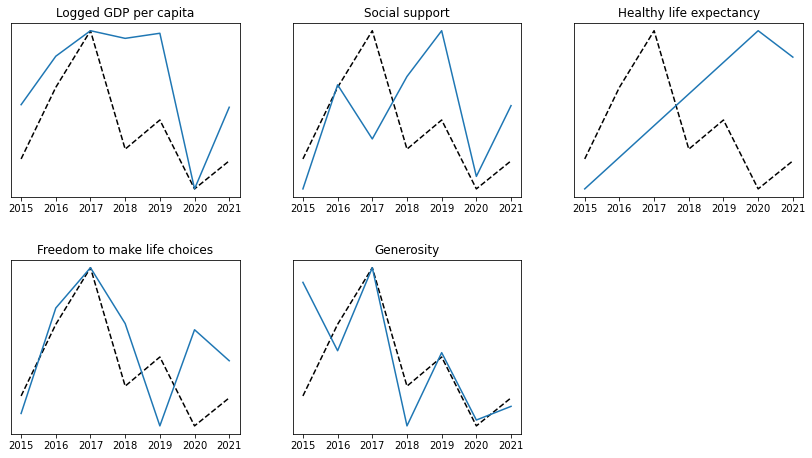

In [20]:
pos = ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1))
cols = [col for col in uae_df.columns 
        if col not in ["Ladder score", "Perceptions of corruption"]]
mapping = dict(zip(cols, pos))

fig, axs = plt.subplots(2, 3, figsize=(12,7))
for k in mapping.keys():
    axs[mapping[k]].plot(uae_df["Ladder score"], label="Ladder score", 
                         color='black', linestyle='dashed')    
    axs[mapping[k]].plot(uae_df[k])
    axs[mapping[k]].set_title(k)
    axs[mapping[k]].get_yaxis().set_visible(False)
plt.tight_layout(pad=3)
fig.delaxes(axs[1, 2])
plt.show()

In [21]:
df.to_csv("data/prepared.csv")